[ Info: Initializing simulation...
[ Info:     ... simulation initialization complete (7.529 ms)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (14.833 ms).
[ Info: Simulation is stopping after running for 1.524 seconds.
[ Info: Model iteration 200 equals or exceeds stop iteration 200.


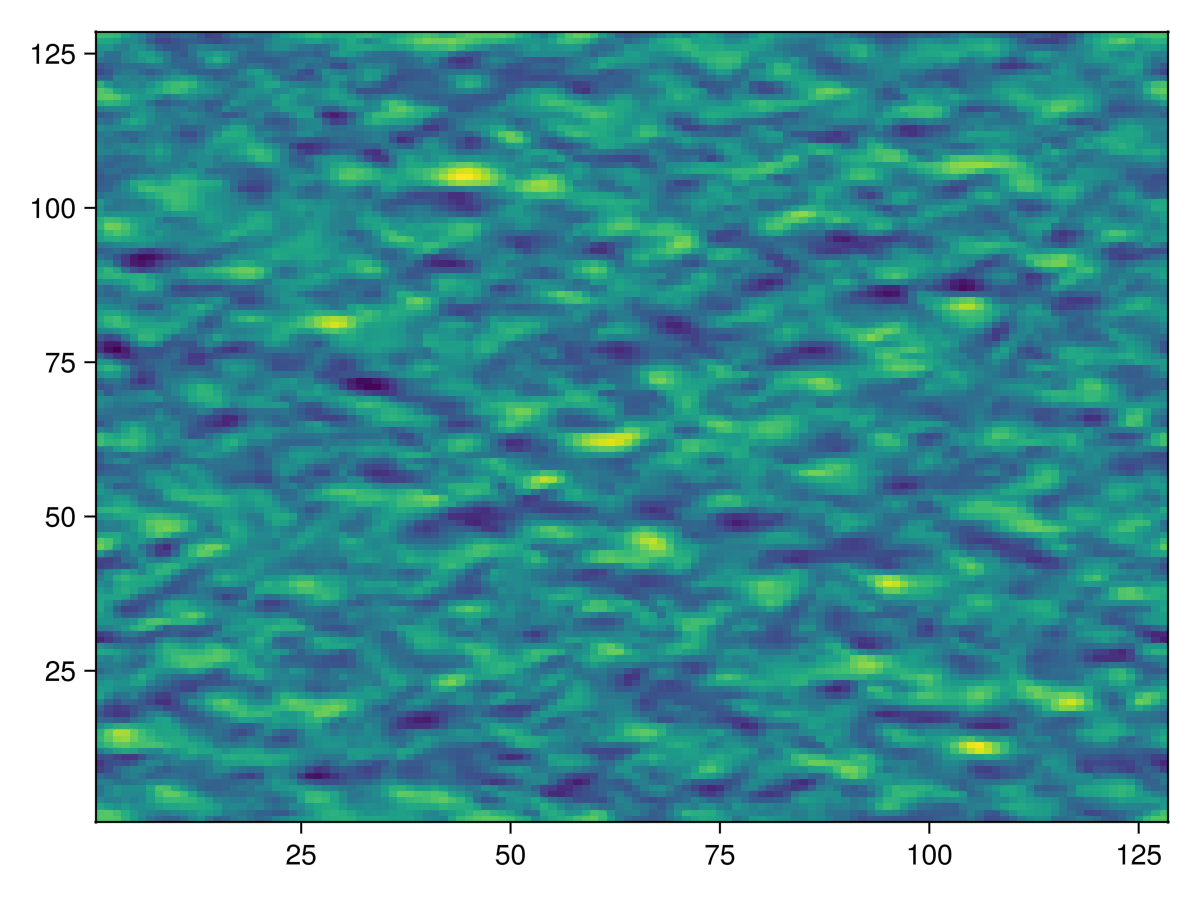

In [7]:
using Oceananigans
using GLMakie

Nx = Ny = 128
grid = RectilinearGrid(size=(Nx, Ny), x=(0, 1), y=(0, 1), topology=(Periodic, Periodic, Flat))
model = NonhydrostaticModel(; grid, advection=WENO(order=5))
ui(x, y) = randn()
set!(model, u=ui, v=ui)
simulation = Simulation(model, Δt=0.1/Nx, stop_iteration=200)
run!(simulation)
heatmap(interior(model.velocities.u, :, :, 1))

# Diagnostics

In [8]:
u, v, w = model.velocities
s_op = sqrt(u^2 + v^2)

UnaryOperation at (Face, Center, Center)
├── grid: 128×128×1 RectilinearGrid{Float64, Periodic, Periodic, Flat} on CPU with 3×3×0 halo
└── tree: 
    sqrt at (Face, Center, Center) via identity
    └── + at (Face, Center, Center)
        ├── ^ at (Face, Center, Center)
        │   ├── 128×128×1 Field{Face, Center, Center} on RectilinearGrid on CPU
        │   └── 2
        └── ^ at (Center, Face, Center)
            ├── 128×128×1 Field{Center, Face, Center} on RectilinearGrid on CPU
            └── 2

In [10]:
s_op[1, 1, 1]

0.5269581555856829

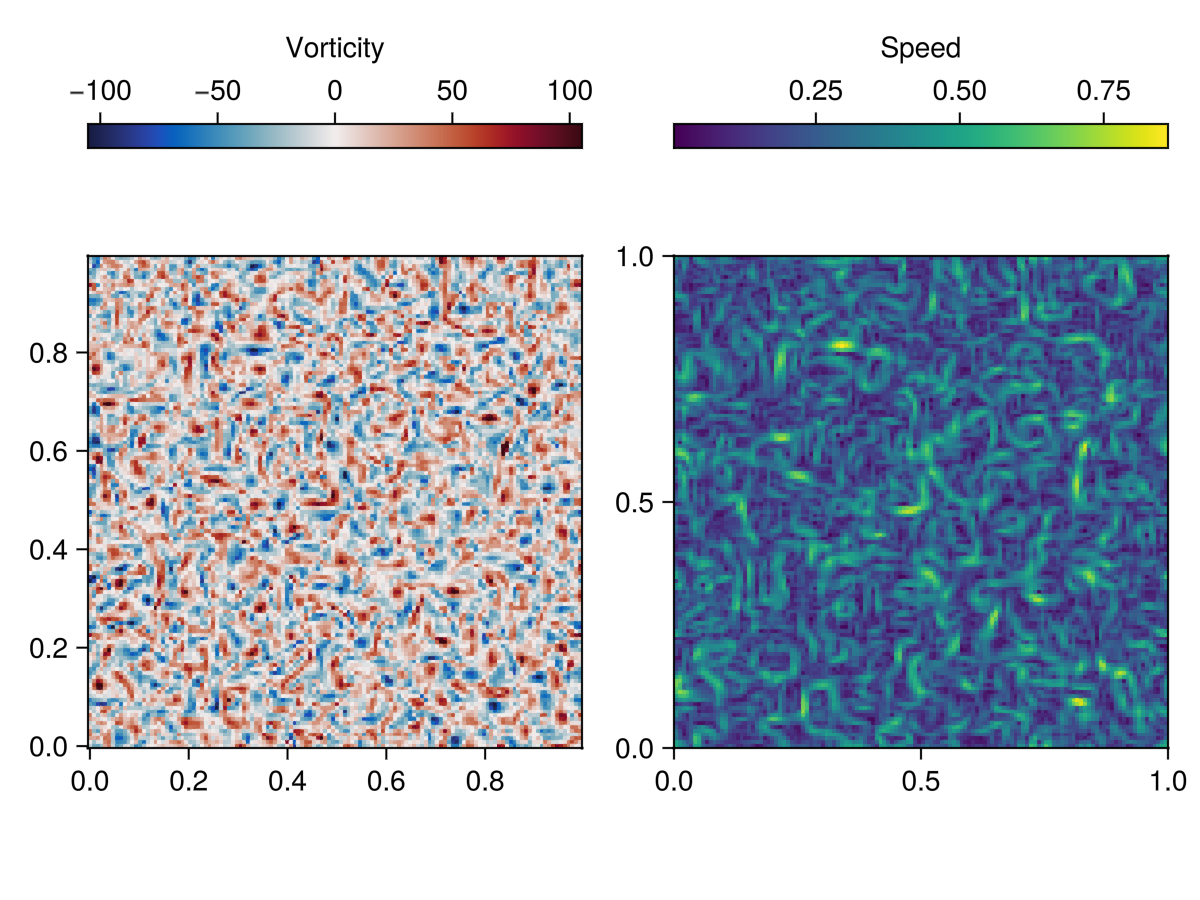

In [24]:
s_op = @at (Center, Center, Center) sqrt(u^2 + v^2)
s = compute!(Field(s_op))

ω_op = ∂x(v) - ∂y(u)
ω = compute!(Field(ω_op))

fig = Figure()
axω = Axis(fig[1, 1], aspect=1)
axs = Axis(fig[1, 2], xlabel="x", ylabaspect=1)

ωlim = 3/4 * maximum(abs, ω)
xω, yω, zω = nodes(ω)
hm = heatmap!(axω, xω, yω, interior(ω, :, :, 1), colormap=:balance, colorrange=(-ωlim, ωlim))
Colorbar(fig[0, 1], hm, label="Vorticity", vertical=false)

xs, ys, zs = nodes(s)
hm = heatmap!(axs, xs, ys, interior(s, :, :, 1), colormap=:viridis) 
Colorbar(fig[0, 2], hm, label="Speed", vertical=false)

fig